In [1]:
import pandas as pd 
import seaborn as sns #visualização de dados
import matplotlib.pyplot as plt #gráficos
from scipy.stats.stats import pearsonr #calculos matemáticos e estatísticos
import numpy as np #computação científica
import statsmodels

#ignorar os warnings
import warnings
warnings.filterwarnings('ignore')

/home/isabella/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df_city = pd.read_csv('Dados/cidades_info_polygon.csv')
df_handset = pd.read_csv('Dados/merge_usuarios_handset_ibge.csv')

## 1 Caracaterização dos dados

In [3]:
df_city.shape

(5570, 47)

In [4]:
df_handset.shape

(63300, 87)

In [5]:
for i,c in enumerate(df_city.columns):
    print(f"\033[92;1m * \033[mColumn {i}: {c}")

 * Column 0: Ano
 * Column 1: Código da Grande Região
 * Column 2: Nome da Grande Região
 * Column 3: Código da Unidade da Federação
 * Column 4: Sigla da Unidade da Federação
 * Column 5: Nome da Unidade da Federação
 * Column 6: Código do Município
 * Column 7: Nome do Município
 * Column 8: Região Metropolitana
 * Column 9: Código da Mesorregião
 * Column 10: Nome da Mesorregião
 * Column 11: Código da Microrregião
 * Column 12: Nome da Microrregião
 * Column 13: Código da Região Rural
 * Column 14: Nome da Região Rural
 * Column 15: Tipo da Região Rural
 * Column 16: Código da Região Geográfica Imediata
 * Column 17: Nome da Região Geográfica Imediata
 * Column 18: Município da Região Geográfica Imediata
 * Column 19: Código da Região Geográfica Intermediária
 * Column 20: Nome da Região Geográfica Intermediária
 * Column 21: Município da Região Geográfica Intermediária
 * Column 22: Amazônia Legal
 * Column 23: Semiárido
 * Column 24: Código Concentração Urbana
 * Column 25: Nome 

In [6]:
for i,c in enumerate(df_handset.columns):
    print(f"\033[92;1m * \033[mColumn {i}: {c}")

 * Column 0: #device_id_
 * Column 1: latitude_work
 * Column 2: longitude_work
 * Column 3: geocodigo_setor_work
 * Column 4: latitude_home
 * Column 5: longitude_home
 * Column 6: geocodigo_setor_home
 * Column 7: handset
 * Column 8: city_ibge_home
 * Column 9: city_ibge_work
 * Column 10: nome comercial
 * Column 11: Marca
 * Column 12: Modelo
 * Column 13: Capacidade Bateria (mAh)
 * Column 14: Memória RAM (GB)
 * Column 15: Memória Armazenamento(GB)
 * Column 16: Bluetooth
 * Column 17: NFC
 * Column 18: Dual chip
 * Column 19: LTE
 * Column 20: Resolução câmera (Mpx)
 * Column 21: Peso (g)
 * Column 22: Dimensões (larguraxalturaxespessura)
 * Column 23: Tamanho tela
 * Column 24: Sistema Operacional
 * Column 25: Versão SO
 * Column 26: Processamento (MHz)
 * Column 27: Link das fontes
 * Column 28: Data atualização
 * Column 29: Ano lançamento
 * Column 30: Preço(R$)
 * Column 31: Avaliação Site
 * Column 32: Avaliação Usuario
 * Column 33: Cod_bairro
 * Column 34: Cod_distrito

In [7]:
#removendo atributos desnecessários na base de handsets
remover_atributos = ['#device_id_','latitude_work','longitude_work','geocodigo_setor_work','latitude_home','longitude_home','geocodigo_setor_home',
                    'Nome_do_municipio','city_ibge_work','Cod_bairro','Cod_distrito','Cod_meso','Cod_municipio','Cod_setor','Cod_subdistrito',
                    'Nome_Grande_Regiao','Nome_da_UF','Nome_do_subdistrito','Situacao_setor','Tipo_setor','media_moradores_por_domicilio',
                    'media_rendimento_medio_por_morador_com_ou_sem_renda','media_rendimento_medio_por_morador_com_renda','media_rendimento_medio_por_morador_reponsavel_com_ou_sem_Renda',
                    'media_rendimento_medio_por_morador_responsavel_com_renda','n_alfabetizados_homens','n_alfabetizados_mulheres','n_amarelos',
                    'n_brancos','n_domicilios','n_homens','n_idade_0_10','n_idade_11_20','n_idade_21_30','n_idade_31_40','n_idade_41_50','n_idade_51_60',
                    'n_idade_61_70','n_idade_71_100','n_indigenas','n_moradores','n_mulheres','n_pardos','n_pretos','variancia_moradores_por_domicilio',
                    'perc_n_mulheres','perc_n_homens','perc_n_mulheres_alfabetizados','perc_n_homens_alfabetizados','perc_n_amarelos','perc_n_brancos',
                    'perc_n_indigenas','perc_n_pardos','perc_n_pretos','perc_n_idade_0_10','perc_n_idade_11_20','perc_n_idade_21_30','perc_n_idade_31_40',
                    'perc_n_idade_41_50','perc_n_idade_51_60','perc_n_idade_61_70','perc_n_idade_71_100']
df_handset.drop(columns = remover_atributos, inplace = True)
df_handset

,handset,city_ibge_home,nome comercial,Marca,Modelo,Capacidade Bateria (mAh),Memória RAM (GB),Memória Armazenamento(GB),Bluetooth,NFC,...,Tamanho tela,Sistema Operacional,Versão SO,Processamento (MHz),Link das fontes,Data atualização,Ano lançamento,Preço(R$),Avaliação Site,Avaliação Usuario
0,LGE:LG-M320,2307650,LG K10 (2017),LG,LG K10 (2017),2800.0,3.0,32.0,4.2,SIM,...,5.3,Android,7.0,1500.0,https://www.kimovil.com/pt/,04/2018,01/2017,889.9900,8.1,6.3
1,samsung:SM-G532MT,2307650,Galaxy J2 Prime TV,Samsung,J2 Prime,2600.0,1.5,16.0,4.2,NAO,...,5.0,Android,6.0.1,1400.0,https://www.tudocelular.com/Samsung/fichas-tec...,05/2018,04/2016,493.0000,6.5,0.0
2,motorola:XT1097,2307650,Motorola Moto X (2014),Motorola,Motorola Moto X (2014),2300.0,2.0,32.0,4.0,SIM,...,5.2,Android,"5.1,5.0,4.4",2500.0,https://www.phonearena.com/,04/2018,0,1350.0000,8.8,9.2
3,LGE:LG-M320,2927408,LG K10 (2017),LG,LG K10 (2017),2800.0,3.0,32.0,4.2,SIM,...,5.3,Android,7.0,1500.0,https://www.kimovil.com/pt/,04/2018,01/2017,889.9900,8.1,6.3
4,motorola:Moto G (4),2927408,Motorola Moto G4,Motorola,Motorola Moto G4,3000.0,2.0,32.0,4.1,NAO,...,5.5,Android,"7.0,6.0",1500.0,https://www.phonearena.com/,04/2018,09/2016,699.0000,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63295,LGE:LM-X410.F,4209409,LG K11,LG,LG K11,3000.0,2.0,16.0,4.2,SIM,...,5.3,Android,7.1.2002,1500.0,https://www.kimovil.com/pt/comparar-celulares,08/2019,03/2018,0.0000,6.8,7.3
63296,LGE:LM-X410.F,3106200,LG K11,LG,LG K11,3000.0,2.0,16.0,4.2,SIM,...,5.3,Android,7.1.2002,1500.0,https://www.kimovil.com/pt/comparar-celulares,08/2019,03/2018,0.0000,6.8,7.3
63297,BLU:Studio G2 HD,4115101,BLU Studio G2 HD,BLU,BLU Studio G2 HD,2000.0,1.0,8.0,4.0,NAO,...,5.0,Android,6.0,1300.0,https://www.phonearena.com/,04/2018,0,488.0000,0.0,0.0
63298,samsung:SM-G935V,3550308,Samsung Galaxy S7 edge,Samsung,Samsung Galaxy S7 edge,3600.0,4.0,32.0,4.2,NAO,...,5.5,Android,"7.0,6.0",2200.0,https://www.phonearena.com/,04/2018,03/2016,1873.2685,9.0,9.3


In [8]:
#Merge das duas bases
df_result = pd.merge(df_city, df_handset, left_on="Código do Município", right_on="city_ibge_home")
df_result 

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,Tamanho tela,Sistema Operacional,Versão SO,Processamento (MHz),Link das fontes,Data atualização,Ano lançamento,Preço(R$),Avaliação Site,Avaliação Usuario
0,2016,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,...,5.5,Android,"7.0,6.0",1600.0,https://www.phonearena.com/,04/2018,09/2016,921.4000,0.0,0.0
1,2016,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,...,5.5,Android,7.0,1600.0,https://www.kimovil.com/pt/,04/2018,06/2017,1120.5000,8.7,0.0
2,2016,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,...,5.3,Android,7.0,1500.0,https://www.phonearena.com/,04/2018,02/2017,629.1000,0.0,0.0
3,2016,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,...,5.3,Android,6.0,1140.0,https://www.kimovil.com/pt/,04/2018,01/2016,560.2500,7.9,6.1
4,2016,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,...,5.0,Android,"6.0,5.1,5.0",1200.0,https://www.phonearena.com/,04/2018,06/2015,979.9100,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63295,2016,5,Centro-oeste,53,DF,Distrito Federal,5300108,Brasília,RIDE - Região Integrada de Desenvolvimento do ...,5301,...,4.0,iOS,"11.x,10.x,9.x",1840.0,https://www.phonearena.com/,04/2018,03/2016,2070.8500,8.8,9.5
63296,2016,5,Centro-oeste,53,DF,Distrito Federal,5300108,Brasília,RIDE - Região Integrada de Desenvolvimento do ...,5301,...,4.0,iOS,"11.x,10.x,9.x",1840.0,https://www.phonearena.com/,04/2018,03/2016,2070.8500,8.8,9.5
63297,2016,5,Centro-oeste,53,DF,Distrito Federal,5300108,Brasília,RIDE - Região Integrada de Desenvolvimento do ...,5301,...,4.7,iOS,11.x,2390.0,https://www.phonearena.com/,04/2018,09/2017,3343.1000,9.2,9.0
63298,2016,5,Centro-oeste,53,DF,Distrito Federal,5300108,Brasília,RIDE - Região Integrada de Desenvolvimento do ...,5301,...,4.7,iOS,11.x,2390.0,https://www.phonearena.com/,04/2018,09/2017,3343.1000,9.2,9.0


In [9]:
df_groupByCidades = df_result.groupby(['Nome do Município'])

In [10]:
#Preços de cada cidade
estatistica_de_preco = df_groupByCidades['Preço(R$)'].describe()
estatistica_de_preco

,count,mean,std,min,25%,50%,75%,max
Nome do Município,,,,,,,,
Abadia de Goiás,3.0,664.336667,194.454362,489.91,559.5050,629.100,751.5500,874.00
Abadiânia,1.0,1120.500000,NaN,1120.50,1120.5000,1120.500,1120.5000,1120.50
Abaetetuba,44.0,762.488864,230.944465,479.00,628.0000,650.100,921.4000,1615.51
Abaeté,2.0,760.650000,227.334830,599.90,680.2750,760.650,841.0250,921.40
Abaiara,5.0,846.778000,254.202431,428.00,874.0000,889.990,921.4000,1120.50
...,...,...,...,...,...,...,...,...
Águas de Santa Bárbara,1.0,650.100000,NaN,650.10,650.1000,650.100,650.1000,650.10
Águia Branca,1.0,650.100000,NaN,650.10,650.1000,650.100,650.1000,650.10
Álvares Florence,2.0,2303.715000,2552.252429,499.00,1401.3575,2303.715,3206.0725,4108.43


In [11]:
#Armazenando apenas dispositivos com preço maior que zero
df_result = df_result[df_result['Preço(R$)']>0]

## 2 Correlação entre variáveis

In [12]:
df_corr = df_result
df_corr = df_corr.corr('kendall')
df_corr = df_corr[['Preço(R$)']].sort_values(by = ['Preço(R$)'],ascending = False)
df_corr

,Preço(R$)
Preço(R$),1.000000
Resolução câmera (Mpx),0.405291
Tamanho tela,0.319283
Processamento (MHz),0.303091
Capacidade Bateria (mAh),0.286019
Peso (g),0.247215
Memória RAM (GB),0.245447
Bluetooth,0.096901
Avaliação Usuario,0.091438
Código da Grande Região,0.068909


Soma das correlações positivas

In [13]:
#cumsum -> retorna uma soma cumulativa em um determinado eixo
df_corr.iloc[1:29].cumsum(axis = 0).iloc[-1:].values[0][0]

2.8417908237042133

In [14]:
df_corr.iloc[:30]

,Preço(R$)
Preço(R$),1.000000
Resolução câmera (Mpx),0.405291
Tamanho tela,0.319283
Processamento (MHz),0.303091
Capacidade Bateria (mAh),0.286019
Peso (g),0.247215
Memória RAM (GB),0.245447
Bluetooth,0.096901
Avaliação Usuario,0.091438
Código da Grande Região,0.068909


## 3 Label Encoder

In [15]:
remover_atributos = ['Código do Município','Ano','Código da Grande Região','Nome da Grande Região','Código da Unidade da Federação',
                    'Sigla da Unidade da Federação','Nome da Unidade da Federação','Região Metropolitana',
                   'Código da Mesorregião','Nome da Mesorregião','Código da Microrregião','Nome da Microrregião',
                    'Código da Região Rural','Nome da Região Rural','Código da Região Geográfica Imediata',
                    'Nome da Região Geográfica Imediata','Município da Região Geográfica Imediata',
                    'Código da Região Geográfica Intermediária','Nome da Região Geográfica Intermediária',
                    'Município da Região Geográfica Intermediária','Amazônia Legal','Semiárido',
                    'Código Concentração Urbana','Nome Concentração Urbana','Código Arranjo Populacional',
                    'Nome Arranjo Populacional','Hierarquia Urbana (principais categorias)',
                    'Cidade-Região de São Paulo','Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)',
                    'Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)','Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)',
                    'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)',
                    'Valor adicionado bruto total, a preços correntes (R$ 1000)','Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)',
                    'Atividade com maior valor adicionado bruto','Atividade com segundo maior valor adicionado bruto','Atividade com terceiro maior valor adicionado bruto',
                    'name','geometry',
                    
                    'Capacidade Bateria (mAh)','Modelo', 'Memória RAM (GB)','Marca','Sistema Operacional','Bluetooth', 'Resolução câmera (Mpx)', 'Peso (g)', 'Tamanho tela',
                    'Processamento (MHz)','Avaliação Site','Memória Armazenamento(GB)','Avaliação Usuario','LTE','Dual chip','NFC', 'nome comercial',
                    'Dimensões (larguraxalturaxespessura)','handset','Link das fontes',
                    'Data atualização', 'Versão SO', 'Ano lançamento','city_ibge_home']
df_result.drop(columns = remover_atributos, inplace = True)
df_result

,Nome do Município,Tipo da Região Rural,Tipo Concentração Urbana,Tipologia Rural-Urbana,Hierarquia Urbana,"Produto Interno Bruto, a preços correntes (R$ 1000)",População (Nº de habitantes),"Produto Interno Bruto per capita (R$ 1,00)",Preço(R$)
0,Alta Floresta D'Oeste,Região Rural da Capital Regional,NaN,Intermediário Adjacente,Centro Local,477783,25506,18732,921.4000
1,Alta Floresta D'Oeste,Região Rural da Capital Regional,NaN,Intermediário Adjacente,Centro Local,477783,25506,18732,1120.5000
2,Alta Floresta D'Oeste,Região Rural da Capital Regional,NaN,Intermediário Adjacente,Centro Local,477783,25506,18732,629.1000
3,Alta Floresta D'Oeste,Região Rural da Capital Regional,NaN,Intermediário Adjacente,Centro Local,477783,25506,18732,560.2500
4,Alta Floresta D'Oeste,Região Rural da Capital Regional,NaN,Intermediário Adjacente,Centro Local,477783,25506,18732,979.9100
...,...,...,...,...,...,...,...,...,...
63295,Brasília,Região Rural da Metrópole Nacional,Grande concentração urbana considerada na anál...,Urbano,Núcleo de Metrópole,235497107,2977216,79100,2070.8500
63296,Brasília,Região Rural da Metrópole Nacional,Grande concentração urbana considerada na anál...,Urbano,Núcleo de Metrópole,235497107,2977216,79100,2070.8500
63297,Brasília,Região Rural da Metrópole Nacional,Grande concentração urbana considerada na anál...,Urbano,Núcleo de Metrópole,235497107,2977216,79100,3343.1000
63298,Brasília,Região Rural da Metrópole Nacional,Grande concentração urbana considerada na anál...,Urbano,Núcleo de Metrópole,235497107,2977216,79100,3343.1000


In [16]:
df_result.update(df_result['Tipo Concentração Urbana'].fillna('Nulo'))

In [17]:
#Transformar objetos em numéricos
from sklearn.preprocessing import LabelEncoder

In [18]:
lab = LabelEncoder()
df_result['Tipo da Região Rural'] = lab.fit_transform(df_result['Tipo da Região Rural'])
df_result['Tipo Concentração Urbana'] = lab.fit_transform(df_result['Tipo Concentração Urbana'])
df_result['Tipologia Rural-Urbana'] = lab.fit_transform(df_result['Tipologia Rural-Urbana'])
df_result['Hierarquia Urbana'] = lab.fit_transform(df_result['Hierarquia Urbana'])

## 4 Feature engineering

In [19]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63296 entries, 0 to 63299
Data columns (total 9 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Nome do Município                                    63296 non-null  object 
 1   Tipo da Região Rural                                 63296 non-null  int64  
 2   Tipo Concentração Urbana                             63296 non-null  int64  
 3   Tipologia Rural-Urbana                               63296 non-null  int64  
 4   Hierarquia Urbana                                    63296 non-null  int64  
 5   Produto Interno Bruto, a preços correntes (R$ 1000)  63296 non-null  int64  
 6   População (Nº de habitantes)                         63296 non-null  int64  
 7   Produto Interno Bruto per capita (R$ 1,00)           63296 non-null  int64  
 8   Preço(R$)                                            63296 non-null

Agrupar pelo nome do município

In [20]:
groupedby = df_result.groupby(['Nome do Município']).agg({'Preço(R$)' : ['mean', 'min', 'max','median','count']}).reset_index()
groupedby

Nome do Município    Preço(R$)                                  
                                     mean      min      max    median count
0            Abadia de Goiás   664.336667   489.91   874.00   629.100     3
1                  Abadiânia  1120.500000  1120.50  1120.50  1120.500     1
2                 Abaetetuba   762.488864   479.00  1615.51   650.100    44
3                     Abaeté   760.650000   599.90   921.40   760.650     2
4                    Abaiara   846.778000   428.00  1120.50   889.990     5
...                      ...          ...      ...      ...       ...   ...
3728  Águas de Santa Bárbara   650.100000   650.10   650.10   650.100     1
3729            Águia Branca   650.100000   650.10   650.10   650.100     1
3730        Álvares Florence  2303.715000   499.00  4108.43  2303.715     2
3731         Álvares Machado   890.166667   650.10  1099.00   921.400     3
3732                  Óbidos   805.505455   629.10  1120.50   759.050    11

[3733 rows x 6 columns]

In [21]:
df_result = pd.merge(df_result,groupedby,how = 'left', on=['Nome do Município','Nome do Município'])
df_result.drop_duplicates(subset="Nome do Município",keep = 'last',inplace = True)

In [22]:
df_result.reset_index()

,index,Nome do Município,Tipo da Região Rural,Tipo Concentração Urbana,Tipologia Rural-Urbana,Hierarquia Urbana,"Produto Interno Bruto, a preços correntes (R$ 1000)",População (Nº de habitantes),"Produto Interno Bruto per capita (R$ 1,00)",Preço(R$),"(Preço(R$), mean)","(Preço(R$), min)","(Preço(R$), max)","(Preço(R$), median)","(Preço(R$), count)"
0,8,Alta Floresta D'Oeste,0,7,0,2,477783,25506,18732,494.1000,828.418889,494.10,1120.5000,921.400,9
1,71,Ariquemes,0,7,4,4,2183383,105896,20618,428.0000,819.360421,428.00,2070.8500,804.320,63
2,116,Cacoal,4,7,4,4,1944787,87877,22131,1349.1000,923.745111,429.00,3543.1000,921.400,45
3,118,Corumbiara,0,7,3,2,236578,8749,27041,650.1000,815.005000,650.10,979.9100,815.005,2
4,121,Costa Marques,0,7,3,2,206123,17031,12103,571.1200,726.710000,571.12,979.9100,629.100,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728,62129,Urutaí,3,7,2,2,83892,3154,26599,685.5000,720.483333,650.10,825.8500,685.500,3
3729,62204,Valparaíso de Goiás,3,0,4,11,2299309,156419,14700,877.4400,799.287600,304.00,1315.5100,825.550,75
3730,62207,Vianópolis,3,7,2,2,373557,13567,27534,899.1000,800.733333,629.10,899.1000,874.000,3
3731,62211,Vicentinópolis,4,7,0,2,344779,8286,41610,1150.0000,803.900000,494.10,1150.0000,785.750,4


In [23]:
#renomeando a coluna das médias do preço
df_result = df_result.rename(columns={('Preço(R$)','mean'):"Preço(R$)_mean",('Preço(R$)','min'):"Preço(R$)_min",('Preço(R$)','max'):"Preço(R$)_max",('Preço(R$)','median'):"Preço(R$)_median",('Preço(R$)','count'):"Preço(R$)_count"})
df_result

,Nome do Município,Tipo da Região Rural,Tipo Concentração Urbana,Tipologia Rural-Urbana,Hierarquia Urbana,"Produto Interno Bruto, a preços correntes (R$ 1000)",População (Nº de habitantes),"Produto Interno Bruto per capita (R$ 1,00)",Preço(R$),Preço(R$)_mean,Preço(R$)_min,Preço(R$)_max,Preço(R$)_median,Preço(R$)_count
8,Alta Floresta D'Oeste,0,7,0,2,477783,25506,18732,494.1000,828.418889,494.10,1120.5000,921.400,9
71,Ariquemes,0,7,4,4,2183383,105896,20618,428.0000,819.360421,428.00,2070.8500,804.320,63
116,Cacoal,4,7,4,4,1944787,87877,22131,1349.1000,923.745111,429.00,3543.1000,921.400,45
118,Corumbiara,0,7,3,2,236578,8749,27041,650.1000,815.005000,650.10,979.9100,815.005,2
121,Costa Marques,0,7,3,2,206123,17031,12103,571.1200,726.710000,571.12,979.9100,629.100,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62129,Urutaí,3,7,2,2,83892,3154,26599,685.5000,720.483333,650.10,825.8500,685.500,3
62204,Valparaíso de Goiás,3,0,4,11,2299309,156419,14700,877.4400,799.287600,304.00,1315.5100,825.550,75
62207,Vianópolis,3,7,2,2,373557,13567,27534,899.1000,800.733333,629.10,899.1000,874.000,3
62211,Vicentinópolis,4,7,0,2,344779,8286,41610,1150.0000,803.900000,494.10,1150.0000,785.750,4


In [24]:
maior = df_result[df_result['Preço(R$)_mean'] >= 3000]
maior = maior[maior['Preço(R$)_count'] < 50]
maior

,Nome do Município,Tipo da Região Rural,Tipo Concentração Urbana,Tipologia Rural-Urbana,Hierarquia Urbana,"Produto Interno Bruto, a preços correntes (R$ 1000)",População (Nº de habitantes),"Produto Interno Bruto per capita (R$ 1,00)",Preço(R$),Preço(R$)_mean,Preço(R$)_min,Preço(R$)_max,Preço(R$)_median,Preço(R$)_count
12417,Pacujá,0,7,2,2,43422,6186,7019,3543.10,3543.10,3543.10,3543.10,3543.10,1
38288,Borebi,0,7,2,2,60756,2548,23845,3523.35,3523.35,3523.35,3523.35,3523.35,1
43068,Pedregulho,0,7,0,2,831741,16582,50159,4108.43,4108.43,4108.43,4108.43,4108.43,1
55597,Erebango,0,7,2,2,97042,3065,31661,4108.43,4108.43,4108.43,4108.43,4108.43,1


In [25]:
maior = maior.index

In [26]:
df_result.drop(maior , inplace=True)
df_result

,Nome do Município,Tipo da Região Rural,Tipo Concentração Urbana,Tipologia Rural-Urbana,Hierarquia Urbana,"Produto Interno Bruto, a preços correntes (R$ 1000)",População (Nº de habitantes),"Produto Interno Bruto per capita (R$ 1,00)",Preço(R$),Preço(R$)_mean,Preço(R$)_min,Preço(R$)_max,Preço(R$)_median,Preço(R$)_count
8,Alta Floresta D'Oeste,0,7,0,2,477783,25506,18732,494.1000,828.418889,494.10,1120.5000,921.400,9
71,Ariquemes,0,7,4,4,2183383,105896,20618,428.0000,819.360421,428.00,2070.8500,804.320,63
116,Cacoal,4,7,4,4,1944787,87877,22131,1349.1000,923.745111,429.00,3543.1000,921.400,45
118,Corumbiara,0,7,3,2,236578,8749,27041,650.1000,815.005000,650.10,979.9100,815.005,2
121,Costa Marques,0,7,3,2,206123,17031,12103,571.1200,726.710000,571.12,979.9100,629.100,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62129,Urutaí,3,7,2,2,83892,3154,26599,685.5000,720.483333,650.10,825.8500,685.500,3
62204,Valparaíso de Goiás,3,0,4,11,2299309,156419,14700,877.4400,799.287600,304.00,1315.5100,825.550,75
62207,Vianópolis,3,7,2,2,373557,13567,27534,899.1000,800.733333,629.10,899.1000,874.000,3
62211,Vicentinópolis,4,7,0,2,344779,8286,41610,1150.0000,803.900000,494.10,1150.0000,785.750,4


### 4.1 Classe de preços

In [27]:
#Flag para sinalizar se foi tirado do site ou não
flag = True

In [28]:
def classe_preco(data):
    #Classes de preços retirados do site
    if flag == True:
        if data <700:
            return 'entrada'
        elif (data>=700) & (data<=1000):
            return 'intermediario'
        elif (data>1000) & (data<=2000):
            return 'mid-high'
        elif (data>2000):
            return 'high-end'
    else:
    #Classe separadas pro quartis
        if data <651:
            return 'barato'
        elif (data>=650) & (data<826):
            return 'moderado'
        elif (data>=826) & (data<922):
            return 'caro'
        else:
            return 'muito caro'

Aplicar a classificação em cada coluna de preço:

In [29]:
df_result['classe_preco'] = ''
df_result['classe_preco_media'] = ''
df_result['classe_preco_mediana'] = ''
df_result['classe_preco_min'] = ''
df_result['classe_preco_max'] = ''

df_result['classe_preco'] = df_result["Preço(R$)"].apply(classe_preco)
df_result['classe_preco_media'] = df_result["Preço(R$)_mean"].apply(classe_preco)
df_result['classe_preco_mediana'] = df_result["Preço(R$)_median"].apply(classe_preco)
df_result['classe_preco_min'] = df_result["Preço(R$)_min"].apply(classe_preco)
df_result['classe_preco_max'] = df_result["Preço(R$)_max"].apply(classe_preco)

Quantidade de dados em cada categoria:

In [30]:
print("\nClasse - 'Preço(R$)_mean'")
entrada = len(df_result[df_result['classe_preco_media'] == 'entrada'])
intermediario = len(df_result[df_result['classe_preco_media'] == "intermediario"])
mid_high = len(df_result[df_result['classe_preco_media'] == 'mid-high'])
high_end = len(df_result[df_result['classe_preco_media'] == 'high-end'])
print("Entrada:",entrada)
print("Intermediário:",intermediario)
print("Mid-High:",mid_high)
print("High-End:", high_end)

print("\nClasse - 'Preço(R$)_median'")
entrada = len(df_result[df_result['classe_preco_mediana'] == 'entrada'])
intermediario = len(df_result[df_result['classe_preco_mediana'] == "intermediario"])
mid_high = len(df_result[df_result['classe_preco_mediana'] == 'mid-high'])
high_end = len(df_result[df_result['classe_preco_mediana'] == 'high-end'])
print("Entrada:",entrada)
print("Intermediário:",intermediario)
print("Mid-High:",mid_high)
print("High-End:", high_end)

print("\nClasse - 'Preço(R$)_min'")
entrada = len(df_result[df_result['classe_preco_min'] == 'entrada'])
intermediario = len(df_result[df_result['classe_preco_min'] == "intermediario"])
mid_high = len(df_result[df_result['classe_preco_min'] == 'mid-high'])
high_end = len(df_result[df_result['classe_preco_min'] == 'high-end'])
print("Entrada:",entrada)
print("Intermediário:",intermediario)
print("Mid-High:",mid_high)
print("High-End:", high_end)

print("\nClasse - 'Preço(R$)_max'")
entrada = len(df_result[df_result['classe_preco_max'] == 'entrada'])
intermediario = len(df_result[df_result['classe_preco_max'] == "intermediario"])
mid_high = len(df_result[df_result['classe_preco_max'] == 'mid-high'])
high_end = len(df_result[df_result['classe_preco_max'] == 'high-end'])
print("Entrada:",entrada)
print("Intermediário:",intermediario)
print("Mid-High:",mid_high)
print("High-End:", high_end)


Classe - 'Preço(R$)_mean'
Entrada: 896
Intermediário: 2531
Mid-High: 287
High-End: 15

Classe - 'Preço(R$)_median'
Entrada: 1200
Intermediário: 2375
Mid-High: 140
High-End: 14

Classe - 'Preço(R$)_min'
Entrada: 2868
Intermediário: 776
Mid-High: 80
High-End: 5

Classe - 'Preço(R$)_max'
Entrada: 578
Intermediário: 1767
Mid-High: 930
High-End: 454


## 5 Gráficos

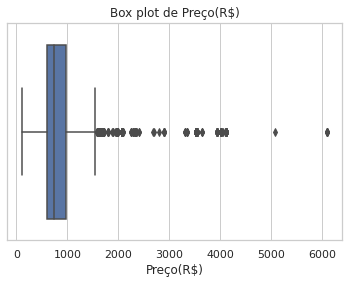

In [31]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = df_result['Preço(R$)'])
plt.title("Box plot de Preço(R$)")
plt.show()

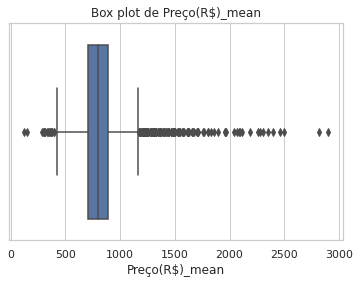

In [32]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = df_result['Preço(R$)_mean'])
plt.title("Box plot de Preço(R$)_mean")
plt.show()

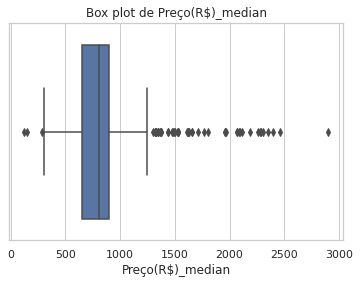

In [33]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = df_result['Preço(R$)_median'])
plt.title("Box plot de Preço(R$)_median")
plt.show()

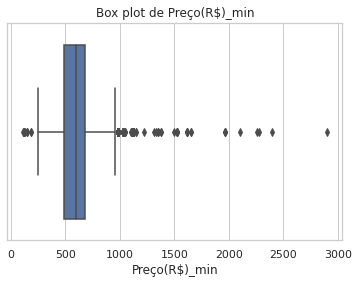

In [34]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = df_result['Preço(R$)_min'])
plt.title("Box plot de Preço(R$)_min")
plt.show()

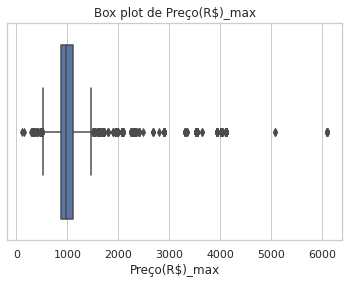

In [35]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = df_result['Preço(R$)_max'])
plt.title("Box plot de Preço(R$)_max")
plt.show()

## 6 Gráfico de correlações

### 6.1 Correlações - Preço(R$)

In [36]:
atributos_corr = ['Preço(R$)','Tipo da Região Rural','Tipologia Rural-Urbana',
                 'Hierarquia Urbana','Produto Interno Bruto, a preços correntes (R$ 1000)','População (Nº de habitantes)',
                 'Produto Interno Bruto per capita (R$ 1,00)']

In [37]:
df_result.dtypes

Nome do Município                                       object
Tipo da Região Rural                                     int64
Tipo Concentração Urbana                                 int64
Tipologia Rural-Urbana                                   int64
Hierarquia Urbana                                        int64
Produto Interno Bruto, a preços correntes (R$ 1000)      int64
População (Nº de habitantes)                             int64
Produto Interno Bruto per capita (R$ 1,00)               int64
Preço(R$)                                              float64
Preço(R$)_mean                                         float64
Preço(R$)_min                                          float64
Preço(R$)_max                                          float64
Preço(R$)_median                                       float64
Preço(R$)_count                                          int64
classe_preco                                            object
classe_preco_media                                     

Preço(R$)


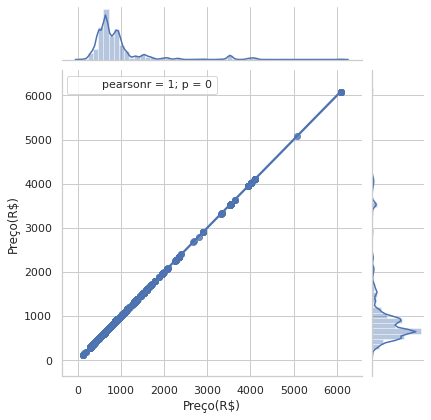

Tipo da Região Rural


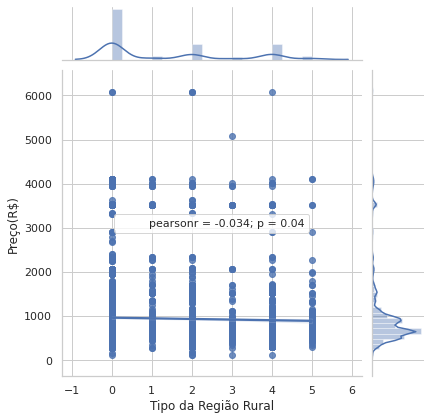

Tipologia Rural-Urbana


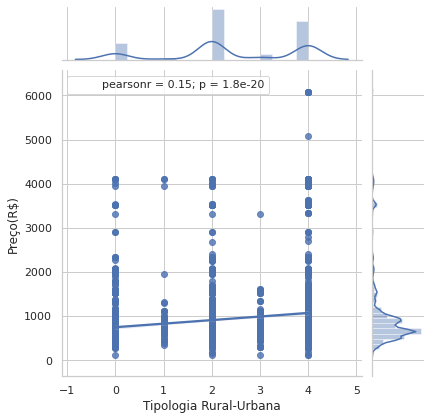

Hierarquia Urbana


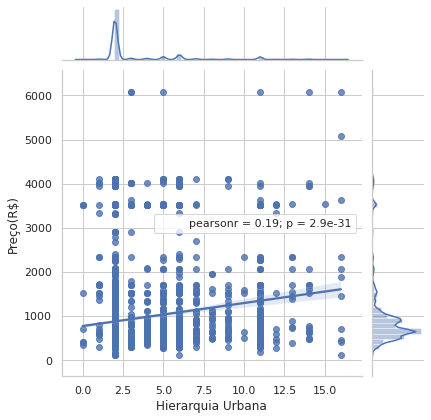

Produto Interno Bruto, a preços correntes (R$ 1000)


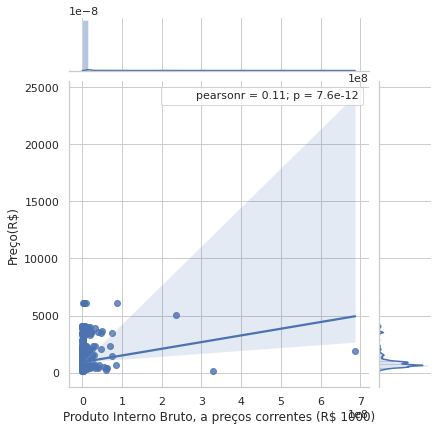

População (Nº de habitantes)


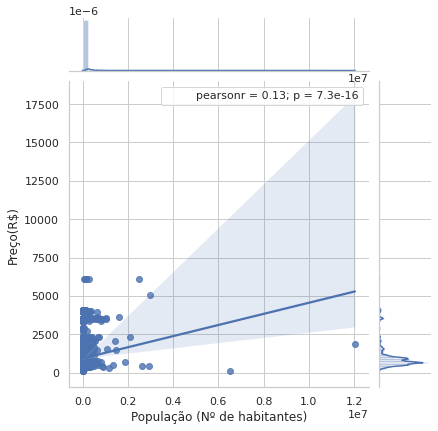

Produto Interno Bruto per capita (R$ 1,00)


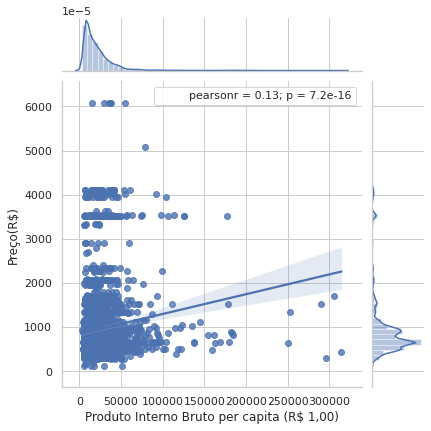

In [38]:
for data in atributos_corr:
    print(data)
    sns.jointplot(data,"Preço(R$)", data = df_result, kind = "reg" ).annotate(pearsonr)
    plt.show()

In [39]:
#'Tipo Concentração Urbana'

### 6.2 Correlações - Preço_mean

In [40]:
atributos_corr = ['Preço(R$)_mean','Tipo da Região Rural','Tipologia Rural-Urbana',
                 'Hierarquia Urbana','Produto Interno Bruto, a preços correntes (R$ 1000)','População (Nº de habitantes)',
                 'Produto Interno Bruto per capita (R$ 1,00)']

Preço(R$)_mean


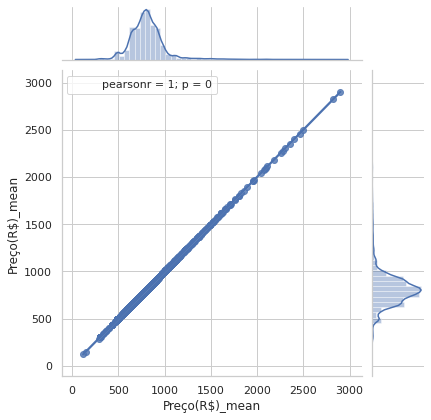

Tipo da Região Rural


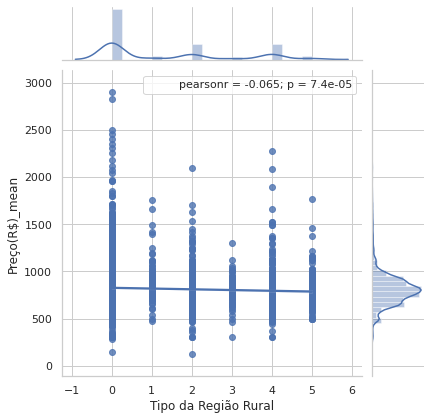

Tipologia Rural-Urbana


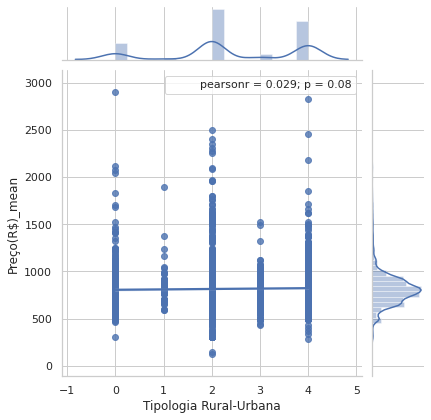

Hierarquia Urbana


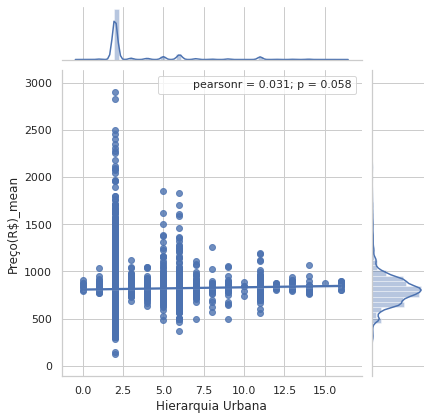

Produto Interno Bruto, a preços correntes (R$ 1000)


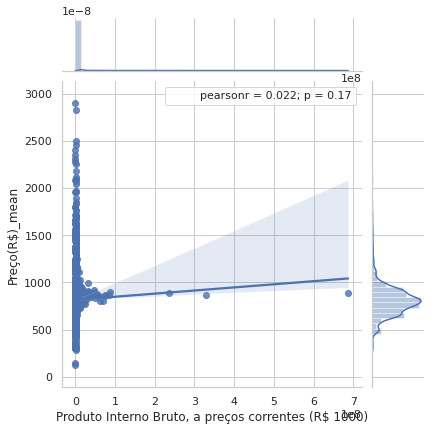

População (Nº de habitantes)


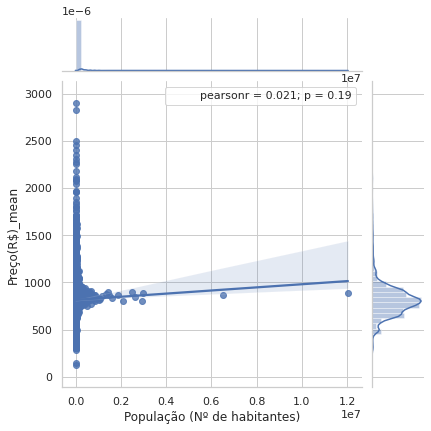

Produto Interno Bruto per capita (R$ 1,00)


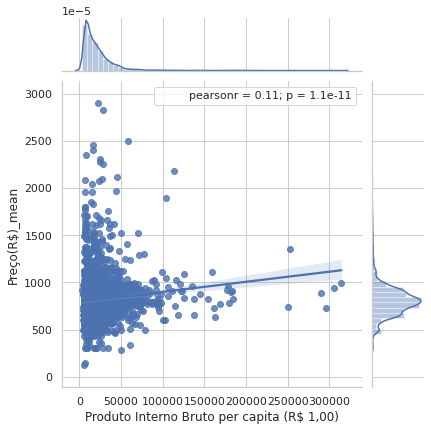

In [41]:
for data in atributos_corr:
    print(data)
    sns.jointplot(data,"Preço(R$)_mean", data = df_result, kind = "reg").annotate(pearsonr)
    plt.show()

### 6.3 Correlações - Preço_median

In [42]:
atributos_corr = ['Preço(R$)_median','Tipo da Região Rural','Tipologia Rural-Urbana',
                 'Hierarquia Urbana','Produto Interno Bruto, a preços correntes (R$ 1000)','População (Nº de habitantes)',
                 'Produto Interno Bruto per capita (R$ 1,00)']

Preço(R$)_median


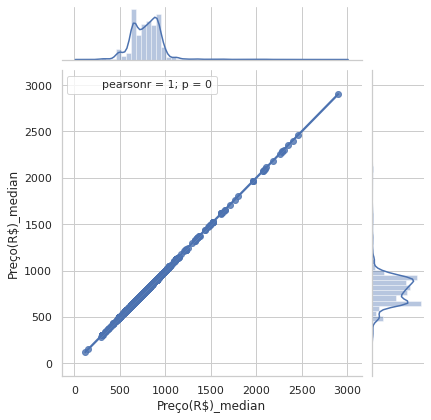

Tipo da Região Rural


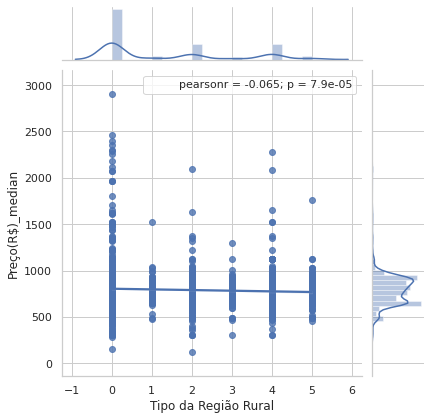

Tipologia Rural-Urbana


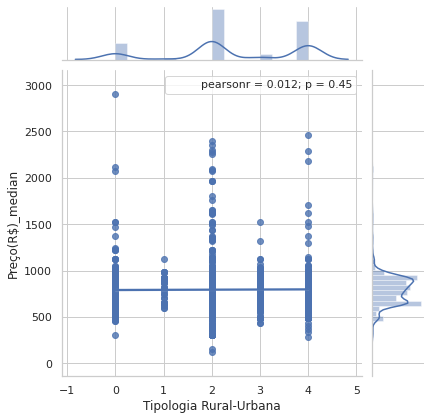

Hierarquia Urbana


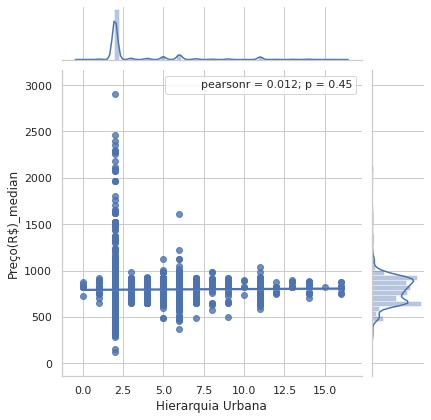

Produto Interno Bruto, a preços correntes (R$ 1000)


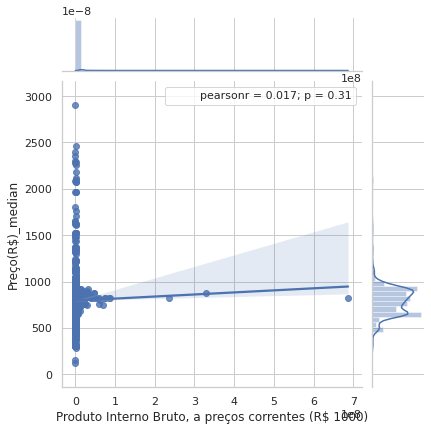

População (Nº de habitantes)


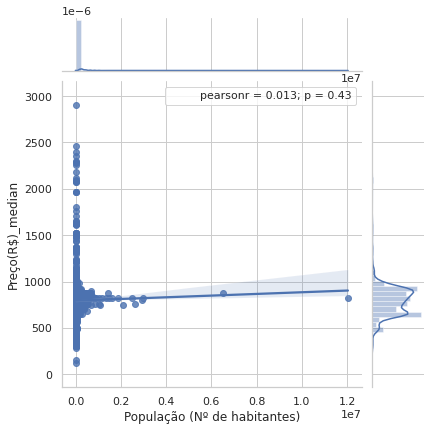

Produto Interno Bruto per capita (R$ 1,00)


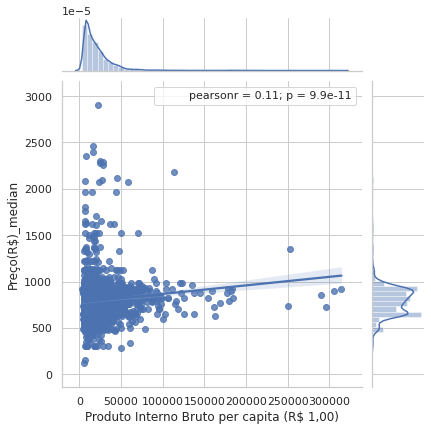

In [43]:
for data in atributos_corr:
    print(data)
    sns.jointplot(data,"Preço(R$)_median", data = df_result, kind = "reg").annotate(pearsonr)
    plt.show()

### 6.4 Correlações - Preço_min

In [44]:
atributos_corr = ['Preço(R$)_min','Tipo da Região Rural','Tipologia Rural-Urbana',
                 'Hierarquia Urbana','Produto Interno Bruto, a preços correntes (R$ 1000)','População (Nº de habitantes)',
                 'Produto Interno Bruto per capita (R$ 1,00)']

Preço(R$)_min


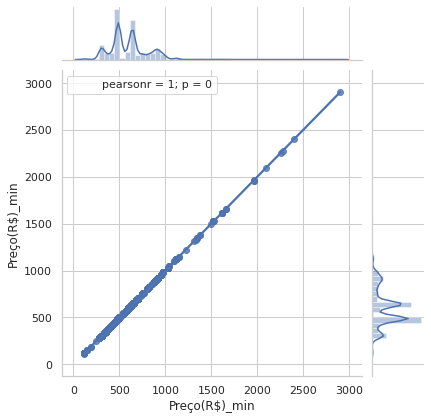

Tipo da Região Rural


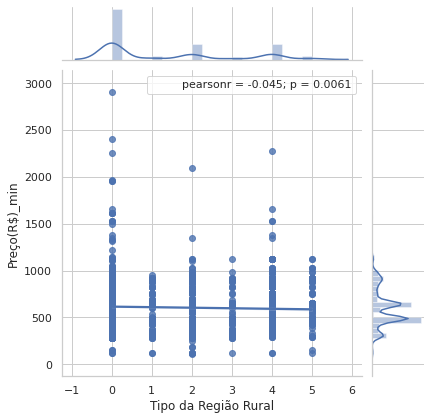

Tipologia Rural-Urbana


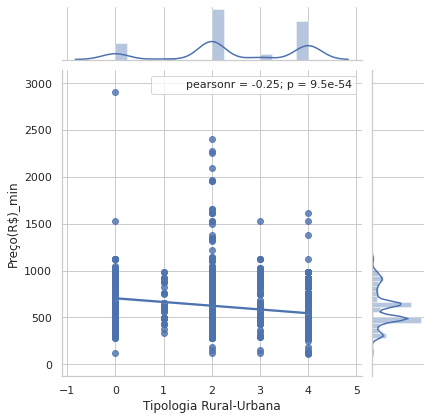

Hierarquia Urbana


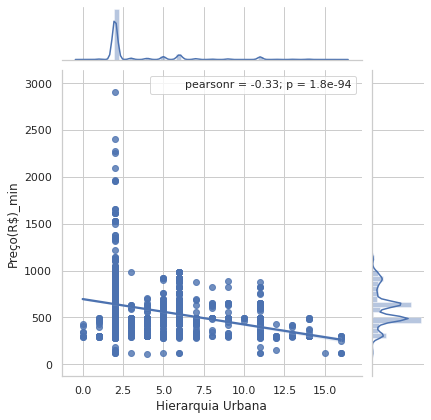

Produto Interno Bruto, a preços correntes (R$ 1000)


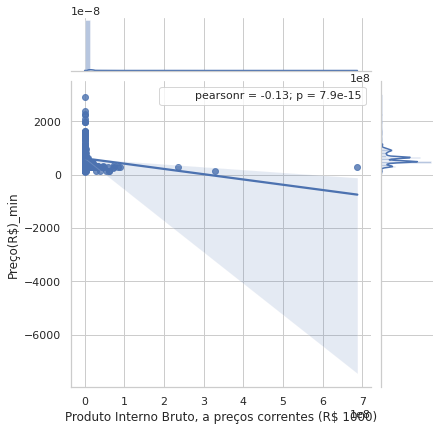

População (Nº de habitantes)


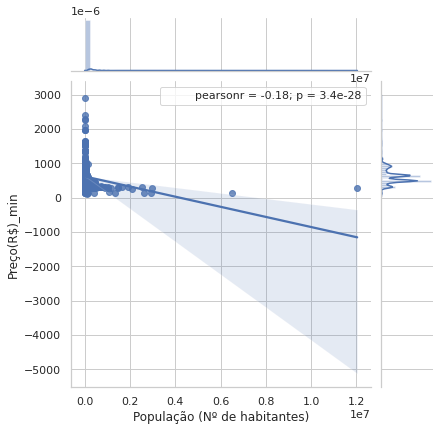

Produto Interno Bruto per capita (R$ 1,00)


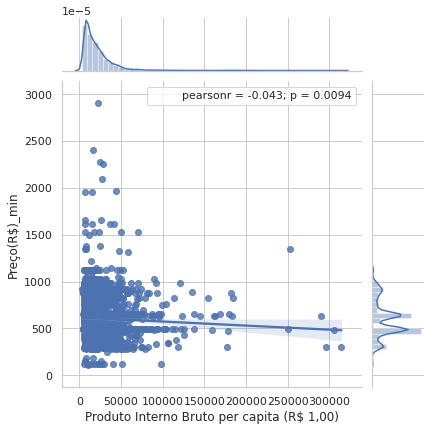

In [45]:
for data in atributos_corr:
    print(data)
    sns.jointplot(data,"Preço(R$)_min", data = df_result, kind = "reg").annotate(pearsonr)
    plt.show()

### 6.5 Correlações - Preço_max

In [46]:
atributos_corr = ['Preço(R$)_max','Tipo da Região Rural','Tipologia Rural-Urbana',
                 'Hierarquia Urbana','Produto Interno Bruto, a preços correntes (R$ 1000)','População (Nº de habitantes)',
                 'Produto Interno Bruto per capita (R$ 1,00)']

Preço(R$)_max


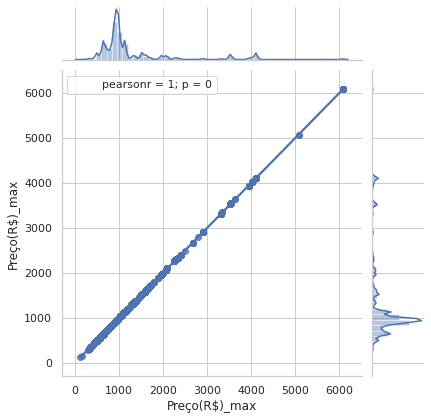

Tipo da Região Rural


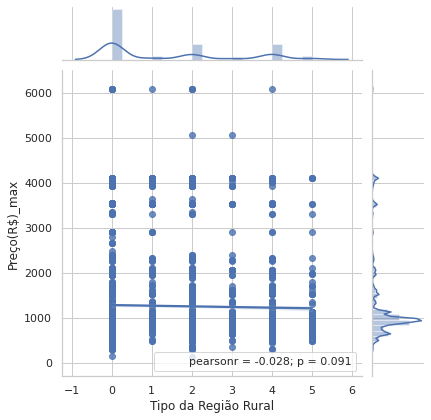

Tipologia Rural-Urbana


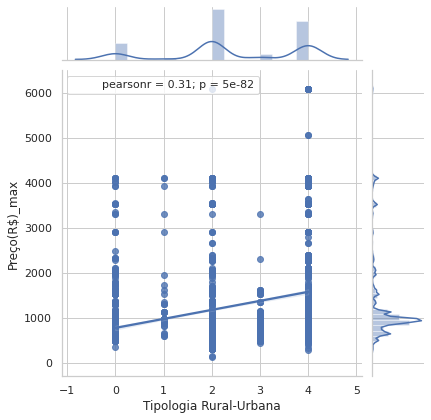

Hierarquia Urbana


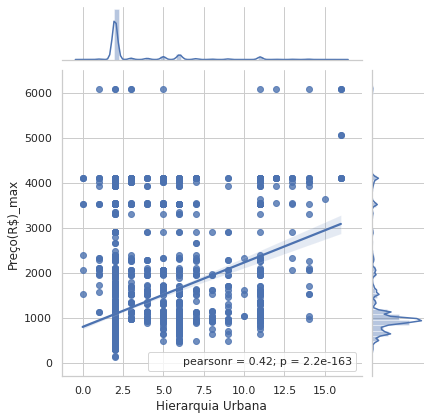

Produto Interno Bruto, a preços correntes (R$ 1000)


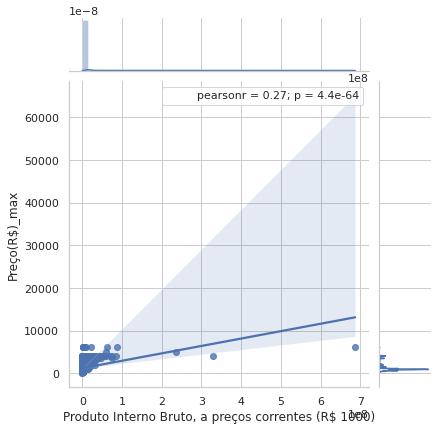

População (Nº de habitantes)


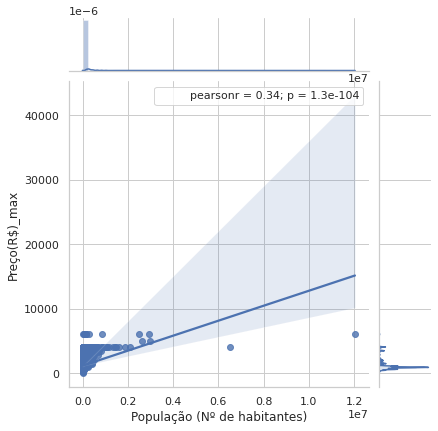

Produto Interno Bruto per capita (R$ 1,00)


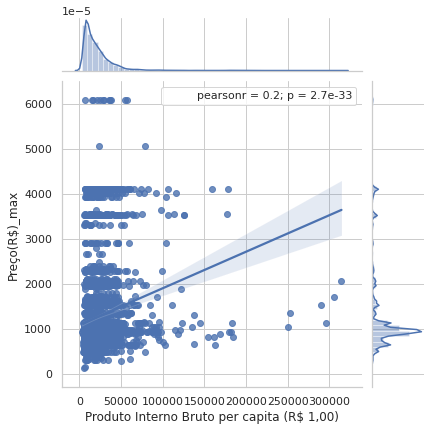

In [47]:
for data in atributos_corr:
    print(data)
    sns.jointplot(data,"Preço(R$)_max", data = df_result, kind = "reg").annotate(pearsonr)
    plt.show()

## 7 Modelos

Abaixo estão os modelos já feitos anteriormente, mas agora para cada uma das classes criadas.

### 7.2 Preço_mean

#### 7.2.1 Preparando os modelos

In [48]:
lab = LabelEncoder()
df_result['classe_preco_media'] = lab.fit_transform(df_result['classe_preco_media'])

In [200]:
X = df_result.drop(columns = ['classe_preco','classe_preco_media','classe_preco_mediana','classe_preco_min','classe_preco_max','Preço(R$)','Preço(R$)_mean','Preço(R$)_median','Preço(R$)_min','Preço(R$)_max','Nome do Município']).values
y = df_result['classe_preco_media'].astype('int64').values.ravel()

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [203]:
from sklearn.metrics import confusion_matrix #importação da matriz de confusão

In [204]:
from yellowbrick.classifier import ConfusionMatrix #gráfico de matriz de confusão
def matriz_confusao(model):
    confusion_matrix(y_pred, y_test)
    cm = ConfusionMatrix(model,classes = classes)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#### 7.2.2 Regressão Logística

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression

In [55]:
logistic = LogisticRegression()

In [56]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred = logistic.predict(X_test)

In [58]:
print("Acurácia Regressão Logística",accuracy_score(y_pred, y_test))

Acurácia Regressão Logística 0.6718115353371243


In [59]:
#Precision -> Porcentagem das identificações positivas as quais foram corretas
print("Precisão Regressão Logística",precision_score(y_pred, y_test,average=None))

Precisão Regressão Logística [0. 0. 1. 0.]


In [60]:
#Recall -> Porcentagem do quanto o modelo conseguiu acertar positivamento as classes
print("Recall Regressão Logística",recall_score(y_pred, y_test,average=None))

Recall Regressão Logística [0.         0.         0.67181154 0.        ]


In [61]:
classes = ['entrada','intermediario','mid-high' ,'high-end']

In [62]:
modelos = ['logistic','decision_tree','bagging','random_forest','clf']

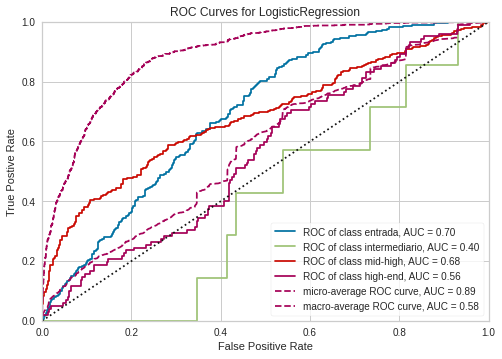

In [63]:
#Curva ROC e Area Abaixo da Curva
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

visualizer = ROCAUC(logistic, classes = classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

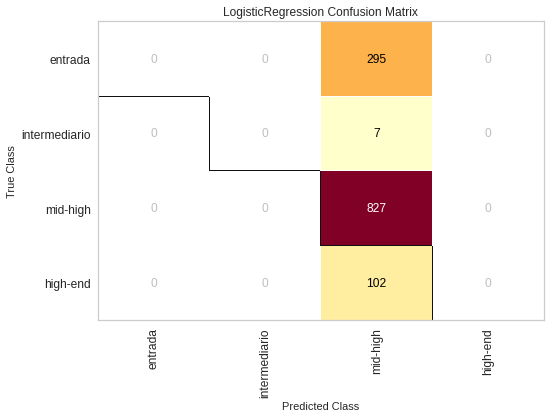

In [64]:
matriz_confusao(logistic)

#### 7.2.3 Árvore de decisão

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [66]:
decision_tree = DecisionTreeClassifier(max_depth=10)

In [67]:
decision_tree_fitted = decision_tree.fit(X_train, y_train)

In [68]:
y_pred = decision_tree.predict(X_test)

In [69]:
print("Acurácia Árvore de decisão",accuracy_score(y_pred, y_test))

Acurácia Árvore de decisão 0.6263200649878148


In [70]:
print("Precisão Árvore de decisão",precision_score(y_pred, y_test,average=None))

Precisão Árvore de decisão [0.24745763 0.         0.84159613 0.01960784]


In [71]:
print("Recall Árvore de decisão",recall_score(y_pred, y_test,average=None))

Recall Árvore de decisão [0.38020833 0.         0.69253731 0.06060606]


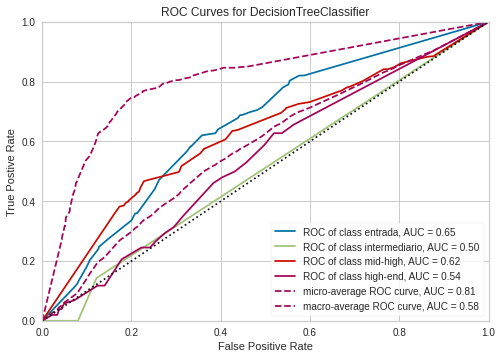

In [72]:
visualizer = ROCAUC(decision_tree, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

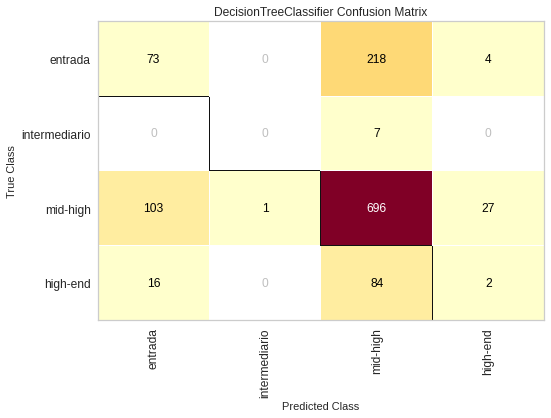

In [73]:
matriz_confusao(decision_tree)

#### 7.2.4 Baggin(Árvore de decisão)

In [74]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [75]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300, max_samples=100, bootstrap=True)

In [76]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [77]:
y_pred = bagging.predict(X_test)

In [78]:
print("Acurácia Árvore de decisão (Baggin)",accuracy_score(y_pred, y_test))

Acurácia Árvore de decisão (Baggin) 0.6726238830219334


In [79]:
print("Precisão Árvore de decisão (Baggin)",precision_score(y_pred, y_test,average=None))

Precisão Árvore de decisão (Baggin) [0.11864407 0.         0.95888755 0.        ]


In [80]:
print("Recall Árvore de decisão (Baggin)",recall_score(y_pred, y_test,average=None))

Recall Árvore de decisão (Baggin) [0.44303797 0.         0.68836806 0.        ]


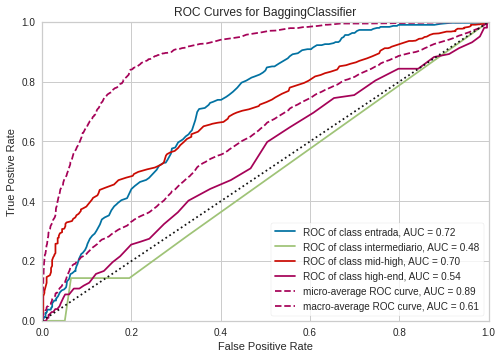

In [81]:
visualizer = ROCAUC(bagging, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

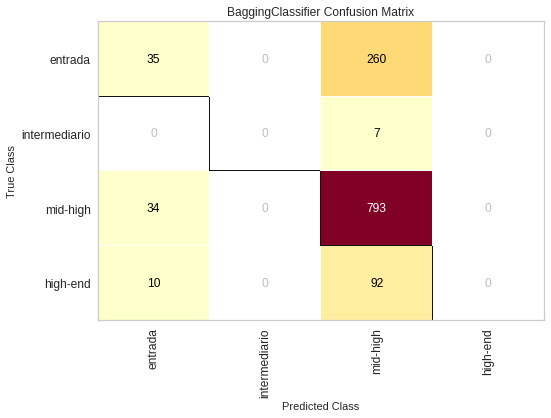

In [82]:
matriz_confusao(bagging)

#### 7.2.5 Random forest 

In [205]:
random_forest = RandomForestClassifier(n_estimators=500)

In [206]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [207]:
y_pred = random_forest.predict(X_test)

In [208]:
print("Acurácia Random Forest",accuracy_score(y_pred, y_test))

Acurácia Random Forest 0.6547522339561332


In [209]:
print("Precisão Random Forest",precision_score(y_pred, y_test,average=None))

Precisão Random Forest [0.2440678  0.         0.88391778 0.02941176]


In [210]:
print("Recall Random Forest",recall_score(y_pred, y_test,average=None))

Recall Random Forest [0.40449438 0.         0.70019157 0.33333333]


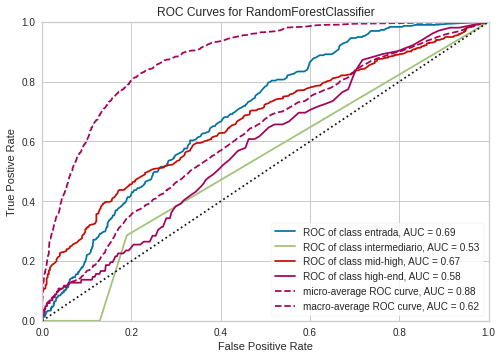

In [88]:
visualizer = ROCAUC(random_forest, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

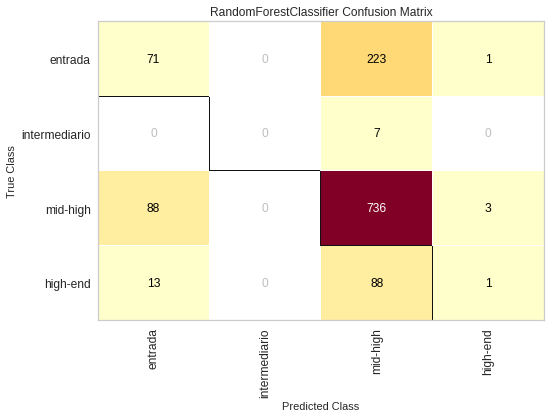

In [89]:
matriz_confusao(random_forest)

#### 7.2.6 KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
n_neighbors = [1,5,10,15,20,25,30,
               35,40,60,80,100,150,
               200,400,600,800]
scores = []
for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    print("\n")

N vizinhos  1
Precisão KNN [0.32542373 0.         0.71100363 0.06862745]
Recall KNN [0.32323232 0.         0.69668246 0.07954545]


N vizinhos  5
Precisão KNN [0.25762712 0.         0.83555018 0.        ]
Recall KNN [0.32618026 0.         0.69517103 0.        ]


N vizinhos  10
Precisão KNN [0.25423729 0.         0.88270859 0.        ]
Recall KNN [0.39893617 0.         0.7012488  0.        ]


N vizinhos  15
Precisão KNN [0.18644068 0.         0.91051995 0.        ]
Recall KNN [0.38732394 0.         0.69146006 0.        ]


N vizinhos  20
Precisão KNN [0.13220339 0.         0.93107618 0.        ]
Recall KNN [0.36111111 0.         0.6856634  0.        ]


N vizinhos  25
Precisão KNN [0.11186441 0.         0.9407497  0.        ]
Recall KNN [0.35869565 0.         0.68305531 0.        ]


N vizinhos  30
Precisão KNN [0.11186441 0.         0.94437727 0.        ]
Recall KNN [0.375      0.         0.68328959 0.        ]


N vizinhos  35
Precisão KNN [0.12542373 0.         0.9528416  0.       

In [92]:
clf = KNeighborsClassifier(n_neighbors=10, n_jobs=8)

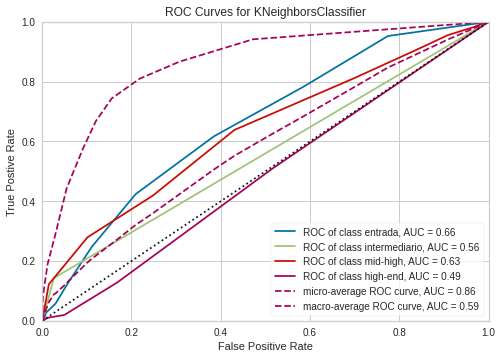

In [93]:
visualizer = ROCAUC(clf, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [94]:
# Observando todos resultados, o KNN com 10 vizinhos conseguiu ser melhor que os outros
clf = KNeighborsClassifier(n_neighbors=10, n_jobs=8)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=8, n_neighbors=10, p=2,
                     weights='uniform')

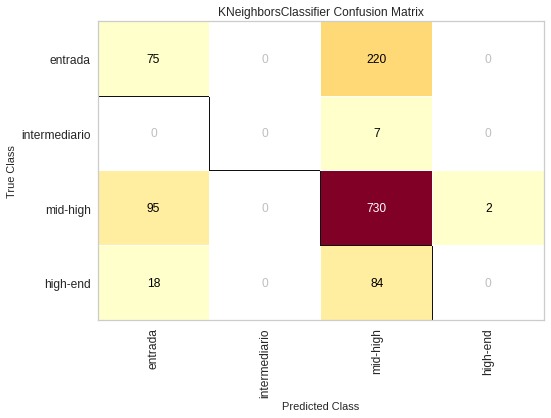

In [95]:
matriz_confusao(clf)

In [96]:
weights = ['uniform', 'distance']
scores = []
for w in weights:
    clf = KNeighborsClassifier(weights = w, n_neighbors = 630, n_jobs = 8)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(w,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    #print(f"\033[94;1m *\033[m Weights: {w} testing finished"
    #     f", score: {scores[-1]}")
    print("\n")

uniform :
N vizinhos  800
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.67181154 0.        ]


distance :
N vizinhos  800
Precisão KNN [0.05423729 0.         0.97339782 0.        ]
Recall KNN [0.36363636 0.         0.67818029 0.        ]




In [97]:
alg = ['ball_tree','kd_tree']
scores = []
for a in alg:
    clf = KNeighborsClassifier(algorithm=a,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(a,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m Algorithm: {a} testing finished"
         f", score: {scores[-1]}")
    print("\n")

ball_tree :
N vizinhos  800
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.67181154 0.        ]
 * Algorithm: ball_tree testing finished, score: 0.6718115353371243


kd_tree :
N vizinhos  800
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.67181154 0.        ]
 * Algorithm: kd_tree testing finished, score: 0.6718115353371243




In [98]:
leaf = [5,10,20,25,30,35,40,45,50]
scores = []
for l in leaf:
    clf = KNeighborsClassifier(algorithm='ball_tree',
                               leaf_size=l,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(l,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m Leaf size: {l} testing finished"
         f", score: {scores[-1]}")
    print("\n")

5 :
N vizinhos  800
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.67181154 0.        ]
 * Leaf size: 5 testing finished, score: 0.6718115353371243


10 :
N vizinhos  800
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.67181154 0.        ]
 * Leaf size: 10 testing finished, score: 0.6718115353371243


20 :
N vizinhos  800
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.67181154 0.        ]
 * Leaf size: 20 testing finished, score: 0.6718115353371243


25 :
N vizinhos  800
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.67181154 0.        ]
 * Leaf size: 25 testing finished, score: 0.6718115353371243


30 :
N vizinhos  800
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.67181154 0.        ]
 * Leaf size: 30 testing finished, score: 0.6718115353371243


35 :
N vizinhos  800
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.67181154 0.        ]
 * Leaf size: 35 testing finished, score: 0.6718115353371

In [99]:
ps = [1,2]
scores = []
for p in ps:
    clf = KNeighborsClassifier(algorithm='ball_tree',
                               p=p,
                               leaf_size=17,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m P: {p} testing finished"
         f", score: {scores[-1]}")
    print("\n")

N vizinhos  800
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.67181154 0.        ]
 * P: 1 testing finished, score: 0.6718115353371243


N vizinhos  800
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.67181154 0.        ]
 * P: 2 testing finished, score: 0.6718115353371243




### 7.3 Preço_median

#### 7.3.1 Preparando os modelos

In [100]:
lab = LabelEncoder()
df_result['classe_preco_mediana'] = lab.fit_transform(df_result['classe_preco_mediana'])

In [101]:
X = df_result.drop(columns = ['classe_preco','classe_preco_media','classe_preco_mediana','classe_preco_min','classe_preco_max','Preço(R$)','Preço(R$)_mean','Preço(R$)_median','Preço(R$)_min','Preço(R$)_max','Nome do Município']).values
y = df_result['classe_preco_mediana'].astype('int64').values.ravel()

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [104]:
from sklearn.metrics import confusion_matrix #importação da matriz de confusão

In [105]:
from yellowbrick.classifier import ConfusionMatrix #gráfico de matriz de confusão
def matriz_confusao(model):
    confusion_matrix(y_pred, y_test)
    cm = ConfusionMatrix(model,classes = classes)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#### 7.3.2 Regressão Logística

In [106]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression

In [107]:
logistic = LogisticRegression()

In [108]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
y_pred = logistic.predict(X_test)

In [110]:
print("Acurácia Regressão Logística",accuracy_score(y_pred, y_test))

Acurácia Regressão Logística 0.620633631194151


In [111]:
#Precision -> Porcentagem das identificações positivas as quais foram corretas
print("Precisão Regressão Logística",precision_score(y_pred, y_test,average=None))

Precisão Regressão Logística [0.         0.         0.99869281 0.        ]


In [112]:
#Recall -> Porcentagem do quanto o modelo conseguiu acertar positivamento as classes
print("Recall Regressão Logística",recall_score(y_pred, y_test,average=None))

Recall Regressão Logística [0.         0.         0.62113821 0.        ]


In [113]:
classes = ['entrada','intermediario','mid-high' ,'high-end']

In [114]:
modelos = ['logistic','decision_tree','bagging','random_forest','clf']

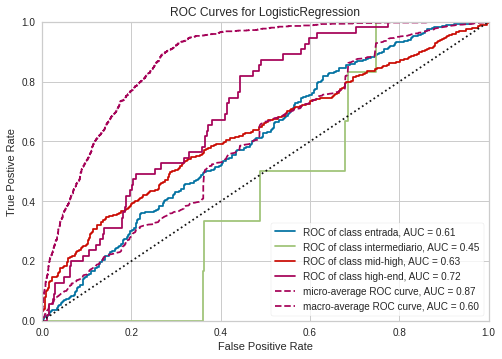

In [115]:
visualizer = ROCAUC(logistic, classes = classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

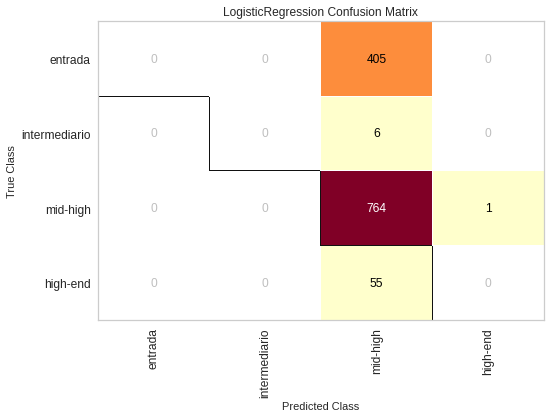

In [116]:
matriz_confusao(logistic)

#### 7.3.3 Árvore de decisão

In [117]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [118]:
decision_tree = DecisionTreeClassifier(max_depth=10)

In [119]:
decision_tree_fitted = decision_tree.fit(X_train, y_train)

In [120]:
y_pred = decision_tree.predict(X_test)

In [121]:
print("Acurácia Árvore de decisão",accuracy_score(y_pred, y_test))

Acurácia Árvore de decisão 0.5995125913891145


In [122]:
print("Precisão Árvore de decisão",precision_score(y_pred, y_test,average=None))

Precisão Árvore de decisão [0.18271605 0.         0.86797386 0.        ]


In [123]:
print("Recall Árvore de decisão",recall_score(y_pred, y_test,average=None))

Recall Árvore de decisão [0.39361702 0.         0.63907603 0.        ]


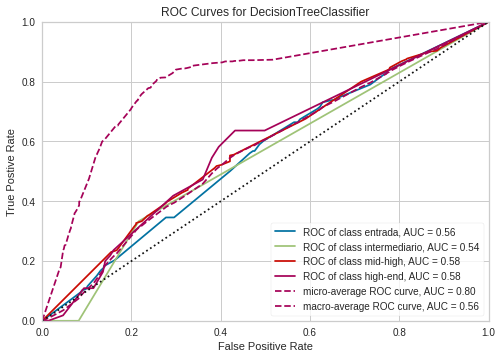

In [124]:
visualizer = ROCAUC(decision_tree, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()
plt.show()

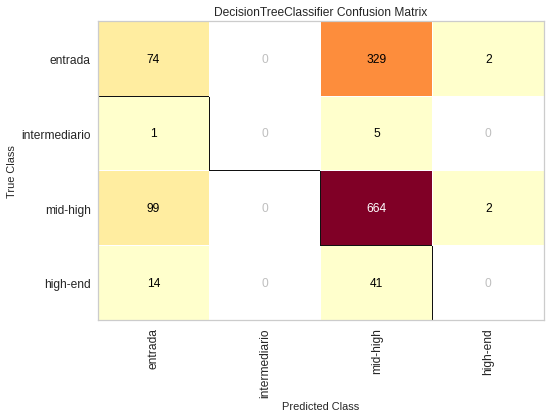

In [125]:
matriz_confusao(decision_tree)

#### 7.3.4 Baggin(Árvore de decisão)

In [126]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [127]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300, max_samples=100, bootstrap=True)

In [128]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [129]:
y_pred = bagging.predict(X_test)

In [130]:
print("Acurácia Árvore de decisão (Baggin)",accuracy_score(y_pred, y_test))

Acurácia Árvore de decisão (Baggin) 0.6173842404549147


In [131]:
print("Precisão Árvore de decisão (Baggin)",precision_score(y_pred, y_test,average=None))

Precisão Árvore de decisão (Baggin) [0.09876543 0.         0.94117647 0.        ]


In [132]:
print("Recall Árvore de decisão (Baggin)",recall_score(y_pred, y_test,average=None))

Recall Árvore de decisão (Baggin) [0.41666667 0.         0.63436123 0.        ]


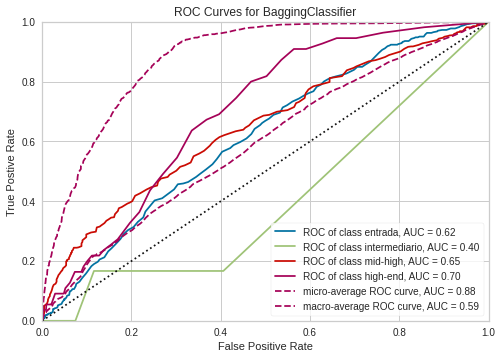

In [133]:
visualizer = ROCAUC(bagging, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

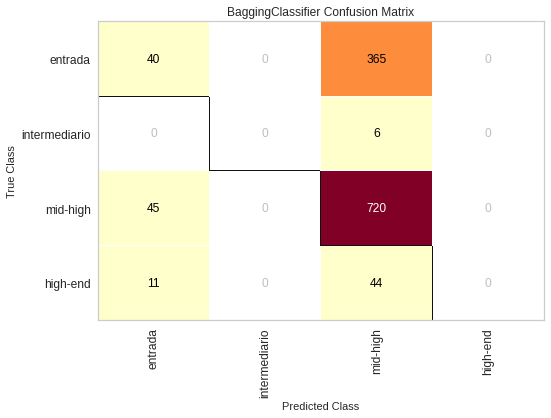

In [134]:
matriz_confusao(bagging)

#### 7.3.5 Random forest 

In [135]:
random_forest = RandomForestClassifier(n_estimators=500)

In [136]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [137]:
y_pred = random_forest.predict(X_test)

In [138]:
print("Acurácia Random Forest",accuracy_score(y_pred, y_test))

Acurácia Random Forest 0.59463850528026


In [139]:
print("Precisão Random Forest",precision_score(y_pred, y_test,average=None))

Precisão Random Forest [0.25925926 0.         0.81699346 0.03636364]


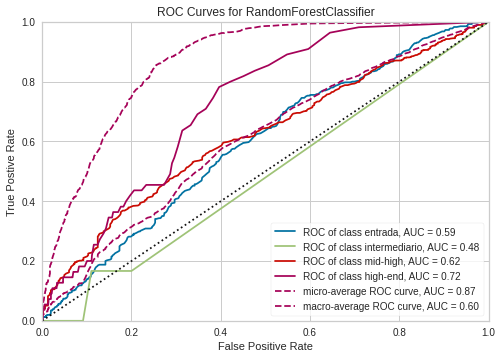

In [140]:
visualizer = ROCAUC(random_forest, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

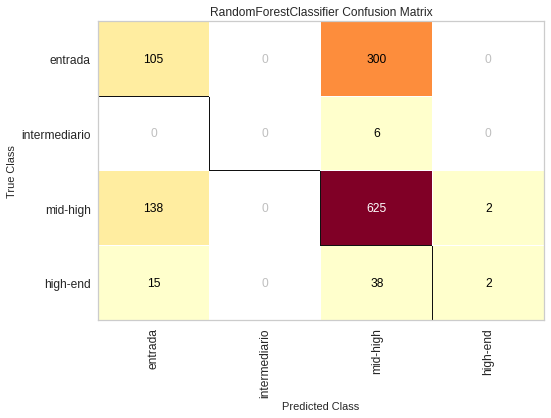

In [141]:
matriz_confusao(random_forest)

#### 7.3.6 KNN

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
n_neighbors = [1,5,10,15,20,25,30,
               35,40,60,80,100,150,
               200,400,600,800,1000,
              1500,2000]
scores = []
for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    print("\n")

N vizinhos  1
Precisão KNN [0.35061728 0.         0.66928105 0.05454545]
Recall KNN [0.36883117 0.         0.64       0.06818182]


N vizinhos  5
Precisão KNN [0.31111111 0.         0.7751634  0.        ]
Recall KNN [0.39375    0.         0.65093304 0.        ]


N vizinhos  10
Precisão KNN [0.3037037  0.         0.80392157 0.        ]
Recall KNN [0.41979522 0.         0.65565032 0.        ]


N vizinhos  15
Precisão KNN [0.22469136 0.         0.85751634 0.        ]
Recall KNN [0.4212963  0.         0.64630542 0.        ]


N vizinhos  20
Precisão KNN [0.21481481 0.         0.88627451 0.        ]
Recall KNN [0.46276596 0.         0.65004794 0.        ]


N vizinhos  25
Precisão KNN [0.14567901 0.         0.90588235 0.        ]
Recall KNN [0.41549296 0.         0.63636364 0.        ]


N vizinhos  30
Precisão KNN [0.12592593 0.         0.92026144 0.        ]
Recall KNN [0.425      0.         0.63366337 0.        ]


N vizinhos  35
Precisão KNN [0.12345679 0.         0.92941176 0.       

In [146]:
clf = KNeighborsClassifier(n_neighbors=10, n_jobs=8)

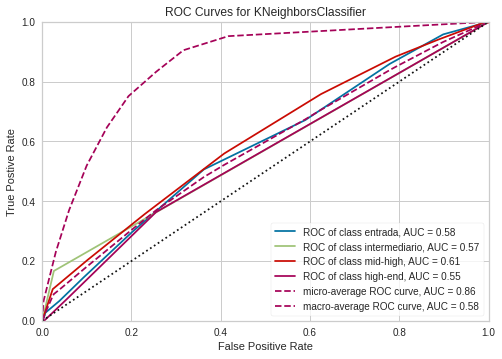

In [147]:
visualizer = ROCAUC(clf, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [148]:
# Observando todos resultados, o KNN com 10 vizinhos conseguiu ser melhor que os outros
clf = KNeighborsClassifier(n_neighbors=10, n_jobs=8)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=8, n_neighbors=10, p=2,
                     weights='uniform')

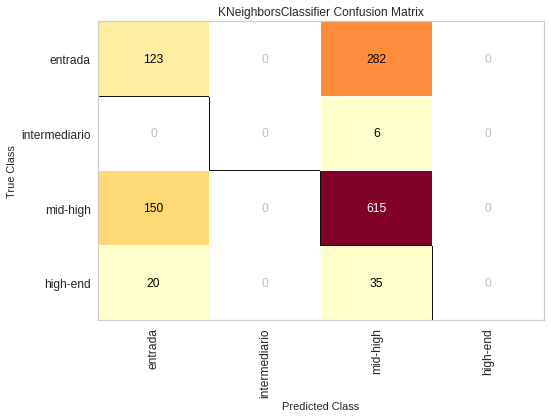

In [149]:
matriz_confusao(clf)

In [150]:
weights = ['uniform', 'distance']
scores = []
for w in weights:
    clf = KNeighborsClassifier(weights = w, n_neighbors = 630, n_jobs = 8)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(w,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    #print(f"\033[94;1m *\033[m Weights: {w} testing finished"
    #     f", score: {scores[-1]}")
    print("\n")

uniform :
N vizinhos  2000
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.62144598 0.        ]


distance :
N vizinhos  2000
Precisão KNN [0.05679012 0.         0.96078431 0.        ]
Recall KNN [0.38983051 0.         0.62713311 0.        ]




In [151]:
alg = ['ball_tree','kd_tree']
scores = []
for a in alg:
    clf = KNeighborsClassifier(algorithm=a,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(a,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m Algorithm: {a} testing finished"
         f", score: {scores[-1]}")
    print("\n")

ball_tree :
N vizinhos  2000
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.62144598 0.        ]
 * Algorithm: ball_tree testing finished, score: 0.6214459788789602


kd_tree :
N vizinhos  2000
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.62144598 0.        ]
 * Algorithm: kd_tree testing finished, score: 0.6214459788789602




In [152]:
leaf = [5,10,20,25,30,35,40,45,50]
scores = []
for l in leaf:
    clf = KNeighborsClassifier(algorithm='ball_tree',
                               leaf_size=l,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(l,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m Leaf size: {l} testing finished"
         f", score: {scores[-1]}")
    print("\n")

5 :
N vizinhos  2000
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.62144598 0.        ]
 * Leaf size: 5 testing finished, score: 0.6214459788789602


10 :
N vizinhos  2000
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.62144598 0.        ]
 * Leaf size: 10 testing finished, score: 0.6214459788789602


20 :
N vizinhos  2000
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.62144598 0.        ]
 * Leaf size: 20 testing finished, score: 0.6214459788789602


25 :
N vizinhos  2000
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.62144598 0.        ]
 * Leaf size: 25 testing finished, score: 0.6214459788789602


30 :
N vizinhos  2000
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.62144598 0.        ]
 * Leaf size: 30 testing finished, score: 0.6214459788789602


35 :
N vizinhos  2000
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.62144598 0.        ]
 * Leaf size: 35 testing finished, score: 0.6214459

In [153]:
ps = [1,2]
scores = []
for p in ps:
    clf = KNeighborsClassifier(algorithm='ball_tree',
                               p=p,
                               leaf_size=17,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m P: {p} testing finished"
         f", score: {scores[-1]}")
    print("\n")

N vizinhos  2000
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.62144598 0.        ]
 * P: 1 testing finished, score: 0.6214459788789602


N vizinhos  2000
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.62144598 0.        ]
 * P: 2 testing finished, score: 0.6214459788789602




### 7.4 Preço(R$)_min

#### 7.4.1 Preparando os modelos

In [154]:
lab = LabelEncoder()
df_result['classe_preco_min'] = lab.fit_transform(df_result['classe_preco_min'])

In [155]:
X = df_result.drop(columns = ['classe_preco','classe_preco_media','classe_preco_mediana','classe_preco_min','classe_preco_max','Preço(R$)','Preço(R$)_mean','Preço(R$)_median','Preço(R$)_min','Preço(R$)_max','Nome do Município']).values
y = df_result['classe_preco_min'].astype('int64').values.ravel()

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [158]:
from sklearn.metrics import confusion_matrix #importação da matriz de confusão

In [159]:
from yellowbrick.classifier import ConfusionMatrix #gráfico de matriz de confusão
def matriz_confusao(model):
    confusion_matrix(y_pred, y_test)
    cm = ConfusionMatrix(model,classes = classes)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#### 7.4.2 Regressão Logística

In [160]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression

In [161]:
logistic = LogisticRegression()

In [162]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
y_pred = logistic.predict(X_test)

In [164]:
print("Acurácia Regressão Logística",accuracy_score(y_pred, y_test))

Acurácia Regressão Logística 0.7725426482534524


In [165]:
#Precision -> Porcentagem das identificações positivas as quais foram corretas
print("Precisão Regressão Logística",precision_score(y_pred, y_test,average=None))

Precisão Regressão Logística [0.99894848 0.         0.00409836 0.        ]


In [166]:
#Recall -> Porcentagem do quanto o modelo conseguiu acertar positivamento as classes
print("Recall Regressão Logística",recall_score(y_pred, y_test,average=None))

Recall Regressão Logística [0.77298617 0.         1.         0.        ]


In [167]:
classes = ['entrada','intermediario','mid-high' ,'high-end']

In [168]:
modelos = ['logistic','decision_tree','bagging','random_forest','clf']

In [169]:
#visualizer = ROCAUC(logistic, classes = classes)
#visualizer.fit(X_train, y_train)
#visualizer.score(X_test, y_test)
##visualizer.show()

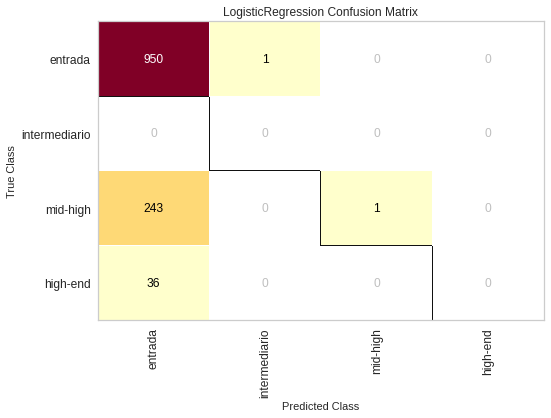

In [170]:
matriz_confusao(logistic)

#### 7.4.3 Árvore de decisão

In [171]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [172]:
decision_tree = DecisionTreeClassifier(max_depth=10)

In [173]:
decision_tree_fitted = decision_tree.fit(X_train, y_train)

In [174]:
y_pred = decision_tree.predict(X_test)

In [175]:
print("Acurácia Árvore de decisão",accuracy_score(y_pred, y_test))

Acurácia Árvore de decisão 0.7497969130787977


In [176]:
print("Precisão Árvore de decisão",precision_score(y_pred, y_test,average=None))

Precisão Árvore de decisão [0.85594111 0.44262295 0.02777778]


In [177]:
print("Recall Árvore de decisão",recall_score(y_pred, y_test,average=None))

Recall Árvore de decisão [0.84527518 0.40909091 0.25      ]


In [178]:
#visualizer = ROCAUC(decision_tree, classes=classes)
#visualizer.fit(X_train, y_train)        
#visualizer.score(X_test, y_test)        
#visualizer.show()

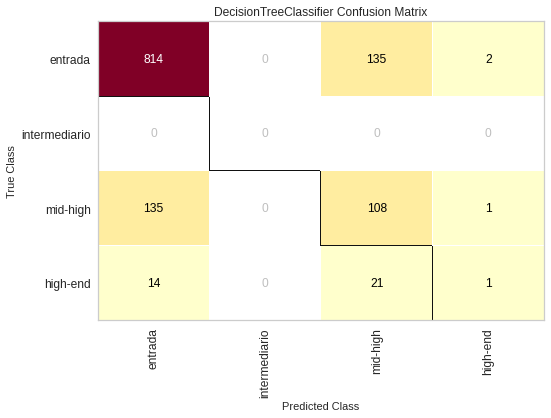

In [179]:
matriz_confusao(decision_tree)

#### 7.4.4 Baggin(Árvore de decisão)

In [180]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [181]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300, max_samples=100, bootstrap=True)

In [182]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [183]:
y_pred = bagging.predict(X_test)

In [184]:
print("Acurácia Árvore de decisão (Baggin)",accuracy_score(y_pred, y_test))

Acurácia Árvore de decisão (Baggin) 0.7961007311129163


In [185]:
print("Precisão Árvore de decisão (Baggin)",precision_score(y_pred, y_test,average=None))

Precisão Árvore de decisão (Baggin) [0.93375394 0.37704918 0.        ]


In [186]:
print("Recall Árvore de decisão (Baggin)",recall_score(y_pred, y_test,average=None))

Recall Árvore de decisão (Baggin) [0.84090909 0.52571429 0.        ]


In [187]:
#visualizer = ROCAUC(bagging, classes=classes)
#visualizer.fit(X_train, y_train)        
#visualizer.score(X_test, y_test)        
#visualizer.show()

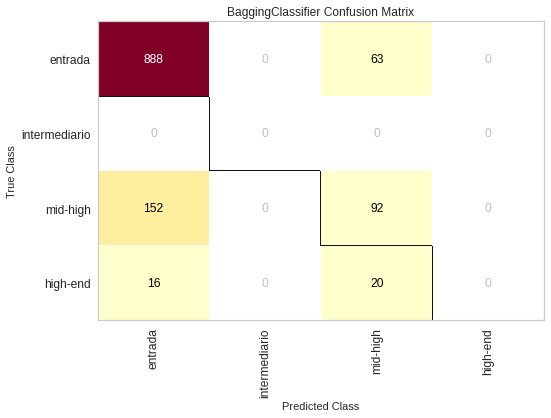

In [188]:
matriz_confusao(bagging)

#### 7.4.5 Random forest 

In [189]:
random_forest = RandomForestClassifier(n_estimators=500)

In [190]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [191]:
y_pred = random_forest.predict(X_test)

In [192]:
print("Acurácia Random Forest",accuracy_score(y_pred, y_test))

Acurácia Random Forest 0.7741673436230707


In [193]:
print("Precisão Random Forest",precision_score(y_pred, y_test,average=None))

Precisão Random Forest [0.91167192 0.3442623  0.05555556]


In [194]:
#visualizer = ROCAUC(random_forest, classes=classes)
#visualizer.fit(X_train, y_train)        
#visualizer.score(X_test, y_test)        
#visualizer.show()

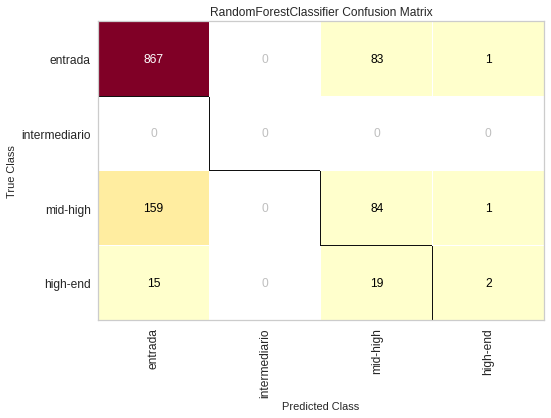

In [195]:
matriz_confusao(random_forest)

#### 7.4.6 KNN

In [196]:
from sklearn.neighbors import KNeighborsClassifier

In [197]:
n_neighbors = [1,5,10,15,20,25,30,
               35,40,60,80,100,150,
               200,400,600,800,1000,
              1500,2000,2500]
scores = []
for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    print("\n")

N vizinhos  1
Precisão KNN [0.82860147 0.         0.28688525 0.02777778]
Recall KNN [0.80820513 0.         0.30567686 0.03846154]


N vizinhos  5
Precisão KNN [0.90431125 0.22131148 0.        ]
Recall KNN [0.79703429 0.35526316 0.        ]


N vizinhos  10
Precisão KNN [0.94637224 0.18852459 0.        ]
Recall KNN [0.80071174 0.42990654 0.        ]


N vizinhos  15
Precisão KNN [0.94532072 0.16393443 0.        ]
Recall KNN [0.79276896 0.41237113 0.        ]


N vizinhos  20
Precisão KNN [0.95268139 0.14344262 0.        ]
Recall KNN [0.79126638 0.40697674 0.        ]


N vizinhos  25
Precisão KNN [0.96319664 0.12295082 0.        ]
Recall KNN [0.78897502 0.42857143 0.        ]


N vizinhos  30
Precisão KNN [0.96424816 0.0942623  0.        ]
Recall KNN [0.78376068 0.37704918 0.        ]


N vizinhos  35
Precisão KNN [0.96740273 0.08606557 0.        ]
Recall KNN [0.78231293 0.38181818 0.        ]


N vizinhos  40
Precisão KNN [0.96529968 0.07786885 0.        ]
Recall KNN [0.78061224 0.3454

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 2498, n_neighbors = 2500

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10, n_jobs=8)

In [ ]:
#visualizer = ROCAUC(clf, classes=classes)
#visualizer.fit(X_train, y_train)        
#visualizer.score(X_test, y_test)        
#visualizer.show()
#plt.show()

In [ ]:
# Observando todos resultados, o KNN com 10 vizinhos conseguiu ser melhor que os outros
clf = KNeighborsClassifier(n_neighbors=10, n_jobs=8)
clf.fit(X_train,y_train)

In [ ]:
matriz_confusao(clf)

In [ ]:
weights = ['uniform', 'distance']
scores = []
for w in weights:
    clf = KNeighborsClassifier(weights = w, n_neighbors = 630, n_jobs = 8)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(w,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    #print(f"\033[94;1m *\033[m Weights: {w} testing finished"
    #     f", score: {scores[-1]}")
    print("\n")

In [ ]:
alg = ['ball_tree','kd_tree']
scores = []
for a in alg:
    clf = KNeighborsClassifier(algorithm=a,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(a,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m Algorithm: {a} testing finished"
         f", score: {scores[-1]}")
    print("\n")

In [ ]:
leaf = [5,10,20,25,30,35,40,45,50]
scores = []
for l in leaf:
    clf = KNeighborsClassifier(algorithm='ball_tree',
                               leaf_size=l,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(l,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m Leaf size: {l} testing finished"
         f", score: {scores[-1]}")
    print("\n")

In [ ]:
ps = [1,2]
scores = []
for p in ps:
    clf = KNeighborsClassifier(algorithm='ball_tree',
                               p=p,
                               leaf_size=17,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m P: {p} testing finished"
         f", score: {scores[-1]}")
    print("\n")

### 7.5 Preço(R$)_max

#### 7.5.1 Preparando os modelos

In [ ]:
lab = LabelEncoder()
df_result['classe_preco_max'] = lab.fit_transform(df_result['classe_preco_max'])

In [ ]:
X = df_result.drop(columns = ['classe_preco','classe_preco_media','classe_preco_mediana','classe_preco_min','classe_preco_max','Preço(R$)','Preço(R$)_mean','Preço(R$)_median','Preço(R$)_min','Preço(R$)_max','Nome do Município']).values
y = df_result['classe_preco_max'].astype('int64').values.ravel()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.metrics import confusion_matrix #importação da matriz de confusão

In [ ]:
from yellowbrick.classifier import ConfusionMatrix #gráfico de matriz de confusão
def matriz_confusao(model):
    confusion_matrix(y_pred, y_test)
    cm = ConfusionMatrix(model,classes = classes)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

### 7.5.2 Regressão Logística

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression()

In [ ]:
logistic.fit(X_train, y_train)

In [ ]:
y_pred = logistic.predict(X_test)

In [ ]:
print("Acurácia Regressão Logística",accuracy_score(y_pred, y_test))

In [ ]:
#Precision -> Porcentagem das identificações positivas as quais foram corretas
print("Precisão Regressão Logística",precision_score(y_pred, y_test,average=None))

In [ ]:
#Recall -> Porcentagem do quanto o modelo conseguiu acertar positivamento as classes
print("Recall Regressão Logística",recall_score(y_pred, y_test,average=None))

In [ ]:
classes = ['entrada','intermediario','mid-high' ,'high-end']

In [ ]:
modelos = ['logistic','decision_tree','bagging','random_forest','clf']

In [ ]:
#Curva ROC e Area Abaixo da Curva

visualizer = ROCAUC(logistic, classes = classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
matriz_confusao(logistic)

#### 7.5.3 Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=10)

In [ ]:
decision_tree_fitted = decision_tree.fit(X_train, y_train)

In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
print("Acurácia Árvore de decisão",accuracy_score(y_pred, y_test))

In [ ]:
print("Precisão Árvore de decisão",precision_score(y_pred, y_test,average=None))

In [ ]:
print("Recall Árvore de decisão",recall_score(y_pred, y_test,average=None))

In [ ]:
visualizer = ROCAUC(decision_tree, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [ ]:
matriz_confusao(decision_tree)

#### 7.5.4 Baggin(Árvore de decisão)

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300, max_samples=100, bootstrap=True)

In [ ]:
bagging.fit(X_train, y_train)

In [ ]:
y_pred = bagging.predict(X_test)

In [ ]:
print("Acurácia Árvore de decisão (Baggin)",accuracy_score(y_pred, y_test))

In [ ]:
print("Precisão Árvore de decisão (Baggin)",precision_score(y_pred, y_test,average=None))

In [ ]:
print("Recall Árvore de decisão (Baggin)",recall_score(y_pred, y_test,average=None))

In [ ]:
visualizer = ROCAUC(bagging, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [ ]:
matriz_confusao(bagging)

#### 7.5.5 Random forest 

In [ ]:
random_forest = RandomForestClassifier(n_estimators=500)

In [ ]:
random_forest.fit(X_train, y_train)

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
print("Acurácia Random Forest",accuracy_score(y_pred, y_test))

In [ ]:
print("Precisão Random Forest",precision_score(y_pred, y_test,average=None))

In [ ]:
visualizer = ROCAUC(random_forest, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [ ]:
matriz_confusao(random_forest)

#### 7.5.6 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
n_neighbors = [1,5,10,15,20,25,30,
               35,40,60,80,100,150,
               200,400,600,800,1000,
              1500,2000,2500]
scores = []
for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    print("\n")

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10, n_jobs=8)

In [ ]:
visualizer = ROCAUC(clf, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [ ]:
# Observando todos resultados, o KNN com 10 vizinhos conseguiu ser melhor que os outros
clf = KNeighborsClassifier(n_neighbors=10, n_jobs=8)
clf.fit(X_train,y_train)

In [ ]:
matriz_confusao(clf)

In [ ]:
weights = ['uniform', 'distance']
scores = []
for w in weights:
    clf = KNeighborsClassifier(weights = w, n_neighbors = 630, n_jobs = 8)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(w,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    #print(f"\033[94;1m *\033[m Weights: {w} testing finished"
    #     f", score: {scores[-1]}")
    print("\n")

In [ ]:
alg = ['ball_tree','kd_tree']
scores = []
for a in alg:
    clf = KNeighborsClassifier(algorithm=a,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(a,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m Algorithm: {a} testing finished"
         f", score: {scores[-1]}")
    print("\n")

In [ ]:
leaf = [5,10,20,25,30,35,40,45,50]
scores = []
for l in leaf:
    clf = KNeighborsClassifier(algorithm='ball_tree',
                               leaf_size=l,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(l,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m Leaf size: {l} testing finished"
         f", score: {scores[-1]}")
    print("\n")

In [ ]:
ps = [1,2]
scores = []
for p in ps:
    clf = KNeighborsClassifier(algorithm='ball_tree',
                               p=p,
                               leaf_size=17,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m P: {p} testing finished"
         f", score: {scores[-1]}")
    print("\n")